In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np

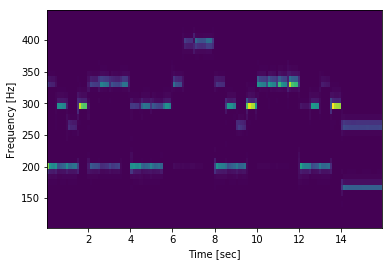

In [16]:
sample_rate, samples = wavfile.read('Chips2-2200Hz-Mary_MIDI-input.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

mask = (frequencies < 450) & (frequencies > 100)

plt.pcolormesh(times, frequencies[mask], spectrogram[ mask, :])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [3]:
samples[:10]

array([ -4941, -16682, -17334,  -8824,  13758,  25121,  21977,  18803,
         8128,    663], dtype=int16)

In [4]:
data = np.load('signals1.npz')

In [5]:
s1, s2, amp = data['arr_0'], data['arr_1'], data['arr_2']
s1, s2, amp = [x[1:] for x in s1], [x[1:] for x in s2], [x[1:] for x in amp]

In [9]:
amp

[array([1008.2395, 1011.1234, 1009.15704, ..., 935.4584, 938.9594,
        946.1102], dtype=object),
 array([265.6817, 266.47107, 265.96182, ..., 247.61967, 248.54016,
        250.43787], dtype=object),
 array([51.54635, 51.69658, 51.61182, ..., 48.049583, 48.23369, 48.604263],
       dtype=object)]

In [10]:
s1, s2, amp = s1[2], s2[2], amp[2]
s1, s2, amp = np.array([x for x in s1]), np.array([x for x in s2]), np.array([x for x in amp])

In [12]:
q = [np.sum(s1[i:] * s2[:-i]) for i in range(1, 250)]
res = np.array(s1)
tmax = np.argmax(q) + 1
res[tmax:] = res[tmax:] + s2[:-tmax]

In [11]:
r1 = np.average((s1 * amp ).reshape(s1.shape[0], -1), axis=1)
r2 = np.average((s2 * amp ).reshape(s1.shape[0], -1), axis=1)
res = np.array(r1)

In [226]:
q = [np.sum(r1[i:] * r2[:-i]) for i in range(1, 250)]

In [227]:
tmax = np.argmax(q) + 1
res[tmax:] = res[tmax:] + r2[:-tmax]

In [228]:
np.sum(res)

0.048585646

In [229]:
np.max(q)

4.274092e-05

In [14]:
def generate_spec(samples, sample_rate):
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

    mask = (frequencies < 450) & (frequencies > 100)

    plt.pcolormesh(times, frequencies[mask], spectrogram[ mask, :])
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

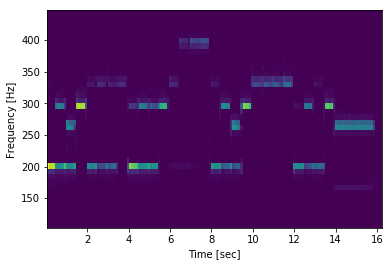

In [21]:
sos = signal.butter(5, (200, 500), 'bandpass', fs=2200, output='sos')
filtered = signal.sosfilt(sos, res)

generate_spec(filtered[2000:], 2200)

In [22]:
wav_res = np.clip((32767 * filtered / np.max(filtered)).astype('i2'), -32767, 32767)
wavfile.write('reconstructed.wav', 2200, wav_res)

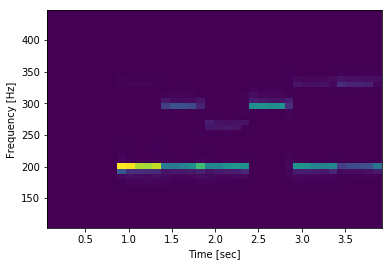

In [252]:
sample_rate, samples = wavfile.read('reconstructed.wav')
frequencies, times, spectrogram = signal.spectrogram(samples[:8800], sample_rate)

mask = (frequencies < 450) & (frequencies > 100)

plt.pcolormesh(times, frequencies[mask], spectrogram[ mask, :])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [259]:
np.std(samples)

12420.510986923022

In [260]:
np.std(wav_res)

11674.189652402016